In [4]:
from tkinter import *
from tksheet import Sheet
from DisparoLineal import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

import pandas as pd

In [5]:
#region variables
x0 = 0
y0 = 0
xf = 0
yf = 0
h = 0
dy1 = 0
dy2 = 0
equation = ''
df = None
points = None
trayectorias = None
allDfCheck = 0
#endregion

def getData():
    global x0, y0, yf, h, dy1, dy2, equation
    x0 = eval(x0_entry.get())
    y0 = eval(y0_entry.get())
    yf = eval(yf_entry.get())
    h  = eval(h_entry.get())
    dy1 = eval(dy1_entry.get())
    dy2 = eval(dy2_entry.get())
    equation = function_entry.get()


def orderData():
    global x0, y0, yf, h, dy1, dy2, df, sheet, equation, trayectorias, allDfCheck
    resultados = DisparoLineal(xi=x0, yi=y0, xf=xf, yf=yf, h=h, dy1=dy1, dy2=dy2, eq=equation).disparoLineal()
    trayectorias = []
    if allDfCheck == 1:
        for i,resultado in enumerate(resultados[0]):
            trayectorias.append(getPoints(resultado))
        df = merge_dataframes(resultados[0]).values.tolist()
    else:
        trayectorias.append(getPoints(resultados[0][-1]))
        df = resultados[0][-1].values.tolist()


def showDF():
    global x0, y0, yf, h, dy1, dy2, df, sheet, equation
    sheet.grid_forget()
    sheet = Sheet(sheet_frame, data= df, header=header)
    sheet.enable_bindings()
    sheet.grid(row=0, column=1, ipadx=150, ipady=80)


def getPoints(df:pd.DataFrame):
    puntos = pd.DataFrame({
        'x':  df['x'][df.index %2 == 0].reset_index(drop=True,inplace=False),
        'y':  df['y/y\''][df.index %2 == 0].reset_index(drop=True,inplace=False),
        'y\'':  df['y/y\''][df.index %2 == 1].reset_index(drop=True,inplace=False)})
    return puntos
    # print(df['y/y\''][df.index %2 == 0])


def merge_dataframes(dataframes):
    merged_df = pd.DataFrame()  # DataFrame resultante para unir los DataFrames

    for df in dataframes:
        if not merged_df.empty:
            # Agregar dos filas vacías al DataFrame resultante
            merged_df = pd.concat([merged_df, pd.DataFrame(index=['', ''])])

        # Agregar el DataFrame actual al DataFrame resultante
        merged_df = pd.concat([merged_df, df])

    return merged_df


def plot():
    global trayectorias, ax1, ax2, time_vs_y, y_vs_yprime, fig1
    ax1.clear()
    ax2.clear()


    for i, df in enumerate(trayectorias):
        ax1.plot(df['x'], df['y'], label=f'Prueba {i+1:d}', marker='o')

    for i, df in enumerate(trayectorias):
        ax2.plot(df['y'], df['y\''], label=f'Prueba {i+1:d}', marker='o')

    ax1.legend()
    ax1.set_title("Tiro parabolico")
    ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$y$')
    ax2.legend()
    ax2.set_title("y vs y\'")
    ax2.set_xlabel(r'$y$')
    ax2.set_ylabel('$y\'$')
    time_vs_y.draw()
    time_vs_y.get_tk_widget().grid(row=1, column=0)
    y_vs_yprime.draw()
    y_vs_yprime.get_tk_widget().grid(row=1, column=1)


def showAllDf():
    global allDfCheck
    allDfCheck += 1
    allDfCheck %= 2


def doAll():
    getData()
    orderData()
    showDF()
    plot()

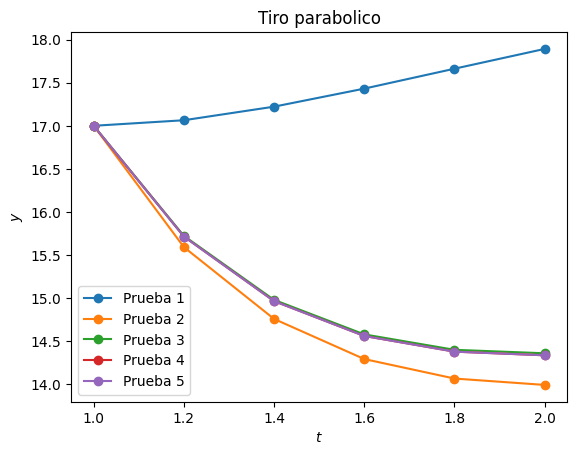

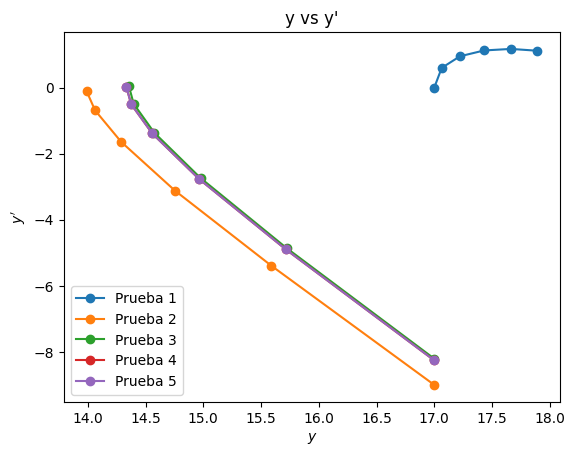

: 

In [6]:
# Ventana principal
header = ['x','y/y\'', 'k1','k2', 'k3','k4']

window = Tk()
window.title("Disparo Lineal")
window.geometry("")
window.grid_columnconfigure(0, weight=1)
window.grid_columnconfigure(1, weight=1)
window.grid_rowconfigure(0, weight=1)
window.grid_rowconfigure(1, weight=1)
# window.config(bg='white')


# Frame para los datos de entrada
input_frame = Frame(window)
input_frame.grid_columnconfigure(0, weight=0)
input_frame.grid_columnconfigure(1, weight=1)
input_frame.grid_rowconfigure(0, weight=1)
input_frame.grid_rowconfigure(1, weight=1)
input_frame.grid_rowconfigure(2, weight=1)
input_frame.grid_rowconfigure(3, weight=1)
input_frame.grid_rowconfigure(4, weight=1)
input_frame.grid_rowconfigure(5, weight=1)
input_frame.grid_rowconfigure(6, weight=1)
input_frame.grid_rowconfigure(7, weight=1)
input_frame.grid_rowconfigure(8, weight=1)


# Frame para la hoja de cálculo
sheet_frame = Frame(window)


# Hoja de cálculo
sheet = Sheet(sheet_frame, data=df, header=header)


# Formulario para datos de entrada
input_frame.grid(row=0, column=0, sticky='nwse', ipadx=150)

x0_label = Label(input_frame, text='x0:')
x0_entry = Entry(input_frame, textvariable=StringVar(value='1'))

y0_label = Label(input_frame, text='y0:')
y0_entry = Entry(input_frame, textvariable=StringVar(value='17'))

xf_label = Label(input_frame, text='xf:')
xf_entry = Entry(input_frame, textvariable=StringVar(value='3'))

yf_label = Label(input_frame, text='yf:')
yf_entry = Entry(input_frame, textvariable=StringVar(value='43/3'))

h_label = Label(input_frame, text='h:')
h_entry = Entry(input_frame, textvariable=StringVar(value='0.2'))

dy1_label = Label(input_frame, text='dy1:')
dy1_entry = Entry(input_frame, textvariable=StringVar(value='0'))

dy2_label = Label(input_frame, text='dy2:')
dy2_entry = Entry(input_frame, textvariable=StringVar(value='-9'))

function_label = Label(input_frame, text='f:')
function_entry = Entry(input_frame, textvariable=StringVar(value='(32-2*x**3-y*y1)/8'))

ingresar_button = Button(input_frame, text='Ingresar', command=doAll)
show_all_tests = Checkbutton(input_frame, text='Intentos', command=showAllDf)

# Posición del formulario
x0_label.grid(row=0,column=0, sticky='e')
y0_label.grid(row=1, column=0, sticky='e')
xf_label.grid(row=2, column=0, sticky='e')
yf_label.grid(row=3, column=0, sticky='e')
h_label.grid(row=4, column=0, sticky='e')
dy1_label.grid(row=5, column=0, sticky='e')
dy2_label.grid(row=6, column=0, sticky='e')
function_label.grid(row=7, column=0, sticky='e')

x0_entry.grid(row=0,column=1, sticky='w')
y0_entry.grid(row=1, column=1, sticky='w')
xf_entry.grid(row=2, column=1, sticky='w')
yf_entry.grid(row=3, column=1, sticky='w')
h_entry.grid(row=4, column=1, sticky='w')
dy1_entry.grid(row=5, column=1, sticky='w')
dy2_entry.grid(row=6, column=1, sticky='w')
function_entry.grid(row=7, column=1, sticky='w')


ingresar_button.grid(row=8, column=1, sticky='w')
show_all_tests.grid(row=8, column=0, sticky='e')

# Hoja de cálculo 
sheet.enable_bindings()
sheet_frame.grid(row=0, column=1)
sheet.grid(row=0, column=1, ipadx=150, ipady=80)

# Canva1
# Crear la figura y el gráfico de matplotlib 1
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
# ax.plot(x, y)

# Crear el objeto FigureCanvasTkAgg para mostrar la gráfica en Tkinter
time_vs_y = FigureCanvasTkAgg(fig1, master=window)
time_vs_y.draw()
time_vs_y.get_tk_widget().grid(row=1, column=0)

#Canva 2
y_vs_yprime = FigureCanvasTkAgg(fig2, master=window)
y_vs_yprime.draw()
y_vs_yprime.get_tk_widget().grid(row=1, column=1)

window.mainloop()